### Author: Chaitanya Phadtare
#Internship on Data Science and Buisness Analytics
#Task 6:Prediction Using Decison tree Algorithm
Dataset: https://bit.ly/3kXTdox



In [1]:
# Importing libraries in Python

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the iris dataset

df = pd.read_csv('Iris.csv')
# Forming the iris dataframe


In [2]:
#Checking top 10 records of Dataset..
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Dataset contains total 6 features in which first is Id, then 4 features(SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalwidthCm) are independent features and 1 feature(Species) is dependent or target variable.

All Independent features has not-null float values and target variable has class labels(Iris-setosa, Iris-versicolor, Iris-virginica)

In [4]:
#Describe function gives the basic numerical info about data for each numeric feature..

df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

As we can see each class has equal number of data points then we can say that its balanced dataset.

# Visualizing Data

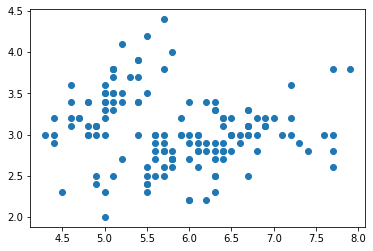

In [6]:
#Visualizing the dataset features to find pattern to solve our task

plt.scatter(df['SepalLengthCm'],df['SepalWidthCm'])
plt.show()

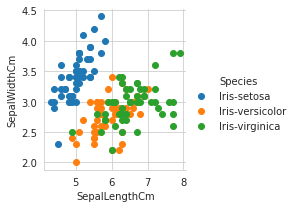

In [7]:
#Using Seaborn lib to visualized 2 features based on target variable.

sns.set_style('whitegrid')
sns.FacetGrid(df, hue = 'Species') \
   .map(plt.scatter, 'SepalLengthCm','SepalWidthCm') \
   .add_legend()

plt.show()

From the scatter we can say that Iris-setosa class is seperated perfectly compared to other two classes

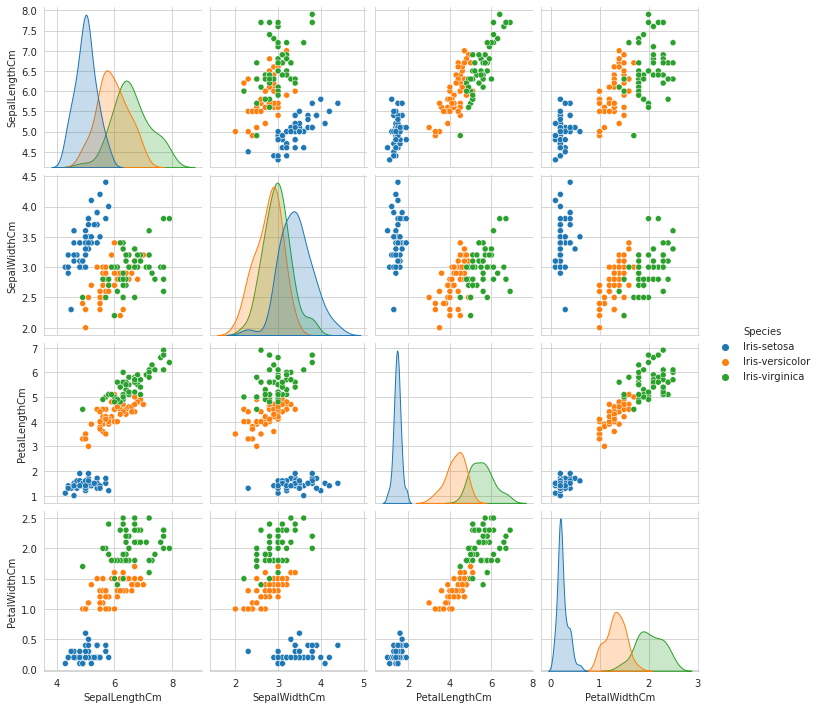

In [8]:
#Pair plot gives the relationship b/w all features distribution with each other..

sns.pairplot(df.drop(['Id'],axis=1), hue='Species')
plt.show()

BY looking the result we sure that all blue points are well separated with other two classes. But Versicolor and virginica are partially overlapping with each other.

In pair plot we saw that their are some feature combination which has very less overlapping between Versicolor and verginica, that's means those feature are very important for our classification task purpose.

With help of Pair plot we are getting some new information but it is more likely similar with our main data features as we saw earlier.
Every combination well separate the Iris-setosa but has some overlapped b/w Versicolor and virginica.

In [9]:
#Droping Id column as it is of no use in classifing the class labels..

df.drop(['Id'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

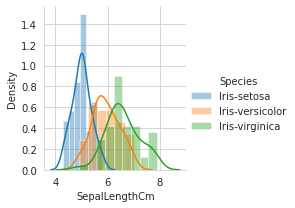

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

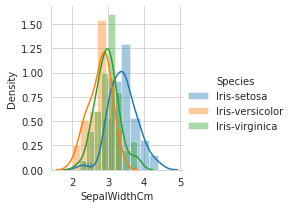

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

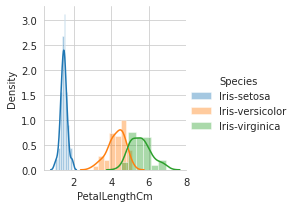

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

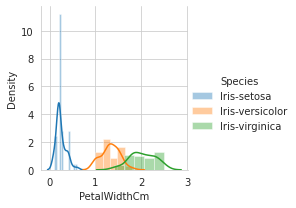

In [10]:
#exploring distribution plot for all features

for i in df.columns:
    if i == 'Species':
        continue
    sns.set_style('whitegrid')
    sns.FacetGrid(df,hue='Species')\
    .map(sns.distplot,i)\
    .add_legend()
    plt.show()

# Building Model

[Text(0.5, 0.9166666666666666, 'X[2] <= 2.45\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'X[3] <= 1.75\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(0.3076923076923077, 0.5833333333333334, 'X[2] <= 4.95\ngini = 0.214\nsamples = 41\nvalue = [0, 36, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[3] <= 1.6\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini =

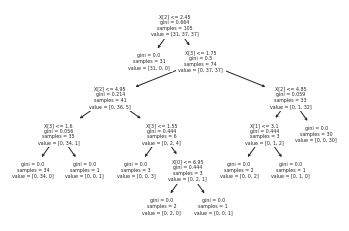

In [11]:
#Now try to create a model to solve our task
#As per our analysis, we can't find much information from new feature which can helpful in solving our problem...
#For solving our task I have selected few features amongs all to build up our best model..

'''Imporing few library for create Decision tree classifier and visualizing the tree structure'''

from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score


'''Here we separating independent varibles or target varibles from Iris dataset'''


X = df[['SepalLengthCm', 'SepalWidthCm','PetalLengthCm', 'PetalWidthCm']]
y = df['Species']


#Before training the model we have split our data into Actual Train and Actual Test Dataset for training and validating purpose...

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.30, random_state=42)




'''Now we have create a Decision tree classifier and trained it with training dataset.'''


Iris_clf = DecisionTreeClassifier(criterion='gini',min_samples_split=2)
Iris_clf.fit(Xtrain, Ytrain)

#Visualized the Tree which is formed on train dataset

tree.plot_tree(Iris_clf)

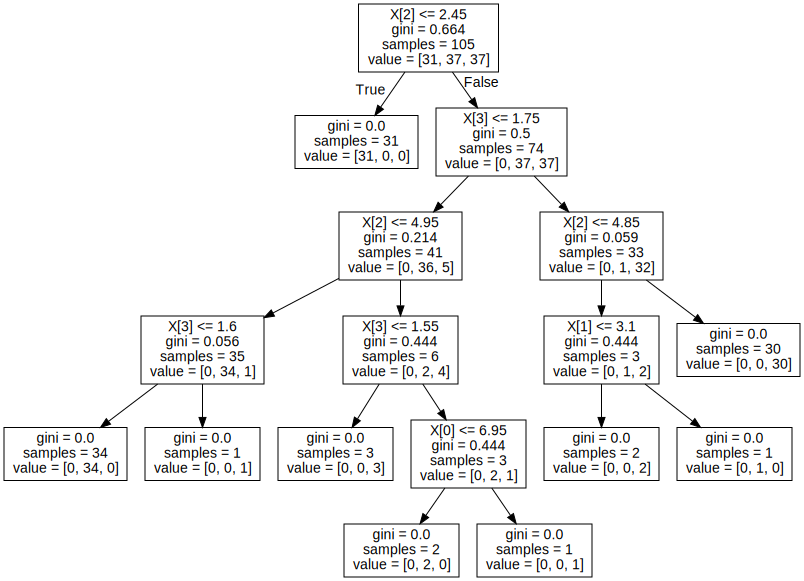

In [12]:
#Visualizing Decision Tree using graphviz library

dot_data = tree.export_graphviz(Iris_clf, out_file=None)

graph = graphviz.Source(dot_data)
graph

In [13]:
# As our model has been trained....
#Now we can validate our Decision tree using cross validation method to get the accuracy or performance score of our model.

print('Accuracy score is:',cross_val_score(Iris_clf, Xtest, Ytest, cv=3, scoring='accuracy').mean())

Accuracy score is: 0.9777777777777779


In [14]:
#Checking validation test data on our trained model and getting performance metrices

from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

Y_temp = Iris_clf.predict(Xtest)


print('Accuracy score for validation test data is:',accuracy_score(Ytest, Y_temp))
multilabel_confusion_matrix(Ytest , Y_temp)

Accuracy score for validation test data is: 1.0


array([[[26,  0],
        [ 0, 19]],

       [[32,  0],
        [ 0, 13]],

       [[32,  0],
        [ 0, 13]]])

In [18]:
#Testing for New points except from Dataset

Test_point = [[5.4,3.0,4.5,1.5],
             [6.5,2.8,4.6,1.5],
             [5.1,2.5,3.0,1.1],
             [5.1,3.3,1.7,0.5],
             [6.0,2.7,5.1,1.6],
             [6.0,2.2,5.0,1.5]]

print(Iris_clf.predict(Test_point))

['Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
